In [1]:
import pandas as pd  
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt  
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest,f_regression


In [2]:
df = pd.read_excel("House_Rent_Train.xlsx")

In [3]:
df.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [4]:
df.tail()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20554,23,BHK1,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(20555, 25)

In [6]:
df.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

In [7]:
df.isnull().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

In [8]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies based on your analysis
df[['latitude', 'longitude']] = imputer.fit_transform(df[['latitude', 'longitude']])
df['property_age'].fillna(df['property_age'].median(), inplace=True)  # Fill missing property_age with median


In [9]:
imputer

SimpleImputer()

In [10]:
# For numerical features, replace missing values with the mean
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

In [11]:
# Handling outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination based on your analysis
df['outlier'] = iso_forest.fit_predict(df[numerical_features])
df = df[df['outlier'] == 1]  # Keep only non-outliers
df.drop('outlier', axis=1, inplace=True)

In [12]:
numerical_features

Index(['latitude', 'longitude', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'property_size', 'property_age', 'bathroom', 'cup_board', 'floor',
       'total_floor', 'balconies', 'rent'],
      dtype='object')

In [13]:
# Encoding categorical variables
label_encoder = LabelEncoder()
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

In [14]:
categorical_features

Index(['id', 'type', 'locality', 'activation_date', 'lease_type', 'furnishing',
       'parking', 'facing', 'amenities', 'water_supply', 'building_type'],
      dtype='object')

In [15]:
# Scaling numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [16]:
scaler


StandardScaler()

In [17]:
df.isnull().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
rent               0
dtype: int64

#### Feature Selection

In [18]:
x =  df.drop("rent", axis=1)  # Features
y = df["rent"]   # target``

In [19]:
x

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
1,8529,2,371,6760,-0.550632,0.332323,0,-0.495803,1.395359,-0.405892,...,-0.289114,0.290256,2,-0.007548,0.858514,0.240632,1419,1,0,0.952323
2,17647,3,1638,12397,1.263386,23.494377,3,-0.495803,1.395359,-0.405892,...,0.023242,1.801979,0,-0.004639,-0.401010,0.657653,1514,2,0,2.002258
3,19180,1,223,4566,0.348794,-0.925587,3,-0.495803,-0.716661,-0.405892,...,-0.445293,-1.221466,0,-0.010458,-0.401010,-0.593411,221,1,3,-1.147549
4,17055,3,1029,18397,0.618026,0.128101,3,-0.495803,-0.716661,-0.405892,...,1.428848,1.801979,0,-0.001729,-1.030772,-1.427454,449,1,3,-0.097613
5,9124,1,1510,14783,1.376543,0.744045,3,2.016928,1.395359,2.463712,...,-0.913828,0.290256,0,-0.010458,0.858514,0.657653,3043,2,0,0.952323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,10,9,1841,18633,0.000290,0.019422,4,2.016928,1.395359,2.463712,...,-0.132936,0.076294,8,-0.000129,0.149433,0.157784,0,3,4,0.059376
20551,12,2,1841,18633,0.000290,0.019422,4,-0.495803,-0.716661,-0.405892,...,-0.132936,0.076294,8,-0.000129,0.149433,0.157784,0,3,4,0.059376
20552,13,2,1841,18633,0.000290,0.019422,4,2.016928,1.395359,-0.405892,...,-0.132936,0.076294,8,-0.000129,0.149433,0.157784,0,3,4,0.059376
20553,14,2,1841,18633,0.000290,0.019422,4,-0.495803,1.395359,-0.405892,...,-0.132936,0.076294,8,-0.000129,0.149433,0.157784,0,3,4,0.059376


In [20]:
y

1        0.490688
2        1.280790
3       -1.352883
4        3.519413
5       -0.036046
           ...   
20550    0.103108
20551    0.103108
20552    0.103108
20553    0.103108
20554    0.103108
Name: rent, Length: 19527, dtype: float64

##### Use SelectKBest with f_regression to selct the top k features 

In [21]:
k_best_features = 10 # Adjust as needed
selector = SelectKBest(f_regression, k=k_best_features)
x_selected = selector.fit_transform(x , y)

In [22]:
k_best_features,selector, x_selected

(10,
 SelectKBest(score_func=<function f_regression at 0x0000020FA6F5B600>),
 array([[-4.95803494e-01,  1.39535904e+00, -4.05891595e-01, ...,
          1.41900000e+03,  0.00000000e+00,  9.52322502e-01],
        [-4.95803494e-01,  1.39535904e+00, -4.05891595e-01, ...,
          1.51400000e+03,  0.00000000e+00,  2.00225828e+00],
        [-4.95803494e-01, -7.16661424e-01, -4.05891595e-01, ...,
          2.21000000e+02,  3.00000000e+00, -1.14754905e+00],
        ...,
        [ 2.01692810e+00,  1.39535904e+00, -4.05891595e-01, ...,
          0.00000000e+00,  4.00000000e+00,  5.93759552e-02],
        [-4.95803494e-01,  1.39535904e+00, -4.05891595e-01, ...,
          0.00000000e+00,  4.00000000e+00,  5.93759552e-02],
        [-4.95803494e-01, -7.16661424e-01, -4.05891595e-01, ...,
          0.00000000e+00,  4.00000000e+00,  5.93759552e-02]]))

##### Features Engineering

In [23]:
important_facilies = ["gym", "park"]

In [24]:
important_facilies

['gym', 'park']

#### Assuming latitude and longitude are in radians

In [25]:
scaler = StandardScaler()
x_selected  = scaler.fit_transform(x[["latitude", "longitude"]])


In [26]:
scaler, x_selected

(StandardScaler(),
 array([[-5.50632024e-01,  3.32322605e-01],
        [ 1.26338649e+00,  2.34943770e+01],
        [ 3.48793804e-01, -9.25587471e-01],
        ...,
        [ 2.89656146e-04,  1.94221432e-02],
        [ 2.89656146e-04,  1.94221432e-02],
        [ 2.89656146e-04,  1.94221432e-02]]))

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn. ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

#### Split dataset into traing and testing

In [28]:
# Split your data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop("rent", axis=1), df["rent"], test_size=0.2, random_state=42)


In [29]:
x_train, x_test, y_train, y_test

(          id  type  locality  activation_date  latitude  longitude  \
 1691    1697     3      1680            14363 -1.236513  -0.864263   
 20063   4810     2       590             5205  0.115020  -0.072422   
 7492   12539     3       559             8917  1.051559   0.426566   
 14249   7549     2      1029             5798  0.600574   0.104588   
 3222   14255     2      1828            12378  0.304253   0.454781   
 ...      ...   ...       ...              ...       ...        ...   
 11867   5487     2      1393            16622 -0.638237  -1.114180   
 12584    988     2       546             9681 -1.377726   0.544943   
 5677    2629     1      1311             9040  1.655457   0.062217   
 906     6081     2       260            14008 -1.364923  -0.278215   
 16624   7548     3      1431             5610 -1.200198  -0.805584   
 
        lease_type       gym      lift  swimming_pool  ...  property_age  \
 1691            0  2.016928  1.395359       2.463712  ...     -0.9138

In [30]:
models = {
    "======Linear Regression": LinearRegression(),
    "======Random Forest": RandomForestRegressor(),
    "======Gradient Boosting": GradientBoostingRegressor(),
    "======Neural Network": MLPRegressor()
}

In [31]:
# Train and evaluate models
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_absolute_error(y_test, predictions)
    print(f"{model_name} MSE: {mse}")

======Linear Regression MSE: 0.4704321737659817
======Random Forest MSE: 0.33427365961693123
======Gradient Boosting MSE: 0.35443979534931336
======Neural Network MSE: 3.1726459174277197


#### Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Define the Random Forest Regressor
rf_regressor = RandomForestRegressor()


In [34]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

X = df.drop(['rent'],axis=1)
y = df['rent']

x_train,x_test,y_train,y_test = train_test_split(X,y)

model = LinearRegression()
model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train error: {math.sqrt(mean_squared_error(y_train,train_pred))}")
print(f"Test error: {math.sqrt(mean_squared_error(y_test,test_pred))}")

Train error: 0.6615939704159353
Test error: 0.6459841925562257


In [36]:
# Perform GridSearchCV
# grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
#grid_search.fit(x_train, y_train)

In [ ]:
#grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
#grid_search.fit(x_train, y_train)
#print("Best hyperparameters:", grid_search.best_params_)
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(x_test)

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the random forest regressor
rf_regressor = RandomForestRegressor()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=3, n_iter=10, n_jobs=-1)

# Perform the randomized search
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_


In [39]:
# Print the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}


In [40]:
# Get the best model
best_rf_model = random_search.best_estimator_
best_rf_model

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=150)

In [41]:
# Make predictions on the test set
predictions = best_rf_model.predict(x_test)
predictions

array([ 0.07397169,  1.28478662, -0.19231973, ..., -0.33084943,
        0.56367661, -0.59307165])

In [42]:
# Evaluate the model using Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Best Random Forest Model MSE on Test Set: {mse}')

Best Random Forest Model MSE on Test Set: 0.21690964090602044


### Interpretability and Explainability:

In [43]:
# Extract feature importances from the best random forest model

feature_importance = best_rf_model.feature_importances_
feature_importance

array([0.01693514, 0.01934052, 0.01519573, 0.015226  , 0.04510026,
       0.14613334, 0.00312541, 0.00066651, 0.00382083, 0.00229508,
       0.0019405 , 0.01316583, 0.01042806, 0.5906886 , 0.0140938 ,
       0.03149206, 0.00488977, 0.00703387, 0.005281  , 0.01954992,
       0.02128789, 0.00301831, 0.0052624 , 0.00402915])

In [44]:
# Get the fetures name

feature_names = x_train.columns
feature_names

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [45]:
# sort feature importance in descending order

indices = feature_importance.argsort()[::-1]
indices 

array([13,  5,  4, 15, 20, 19,  1,  0,  3,  2, 14, 11, 12, 17, 18, 22, 16,
       23,  8,  6, 21,  9, 10,  7], dtype=int64)

In [46]:
# Saving the model
import pickle
with open('best_params.pkl', 'wb') as file:
    pickle.dump(best_params, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)


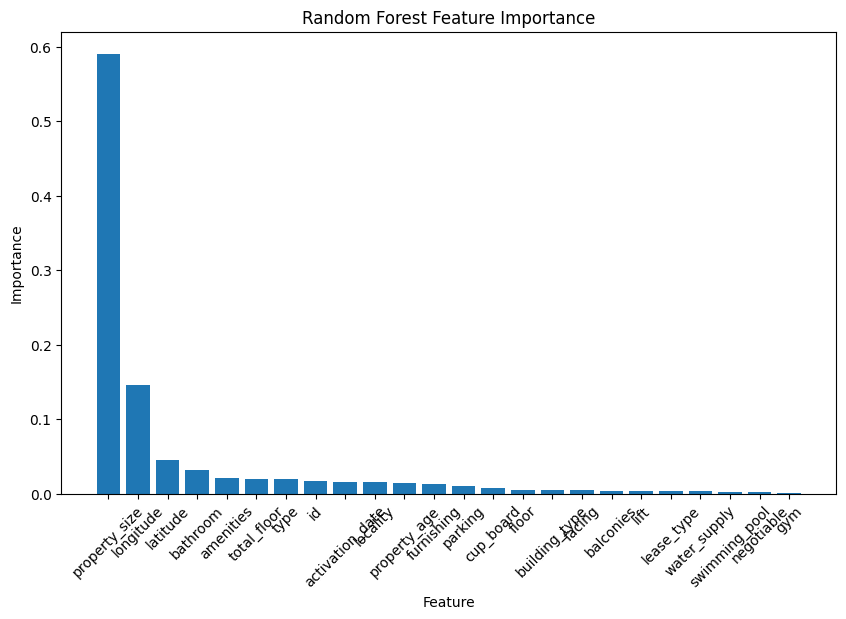

In [47]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()